In [4]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
null_cols = df.isnull().sum()
missing_columns = [col for col, count in null_cols.items() if count > 0]
for col in missing_columns:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
#creating linear regression model
reg = LinearRegression()
X = df.drop(columns=['MEDV'])
Y = df['MEDV']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=123,shuffle=True)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [18]:
reg.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_pred = reg.predict(X_test)
Y_pred

array([15.15654213, 27.99314999, 39.15793658, 17.82290427, 31.02879004,
       38.09147638, 25.42846541, 10.48945985, 15.08214832, 32.39153875,
       29.10931965, 19.37184831, 14.06548975, 31.0769612 , 17.53460068,
       21.18712742, 21.08362969, 37.54270021, 18.27908489, 15.3025289 ,
       13.43913538, 24.26204463, 33.20799154, 39.80402179, 31.22781595,
       22.22850086, 17.99291174, 20.98964195, 22.7219668 , 20.39884295,
       26.0814015 , 33.94845506, 15.44792463, 22.15907682, 24.11009818,
       34.71325014, 29.06043599, 18.2685946 , 14.13521569, 33.32596017,
       31.51337997, 18.75196124, 18.77861288, 39.82566283,  8.55035171,
       27.62276386, 19.5240152 , 25.33880431, 15.63853567, 26.24911856,
       35.30570238, 24.58509375, 19.79538823, 18.34826541, 23.59006523,
       17.88282117,  9.99290112,  2.49369263, 32.02873394, 13.46061641,
       19.64877219, 22.53932978, 20.55548096, 18.01357983, 25.33396698,
       26.65064339, 26.29239385, 21.67495508, 24.9528178 , 30.37

In [22]:
Y_test

410    15.0
85     26.6
280    45.4
422    20.8
199    34.9
       ... 
229    31.5
159    23.3
196    33.3
345    17.5
467    19.1
Name: MEDV, Length: 102, dtype: float64

In [24]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 29.633849614852032
R-squared Score: 0.6418253578104482


In [28]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

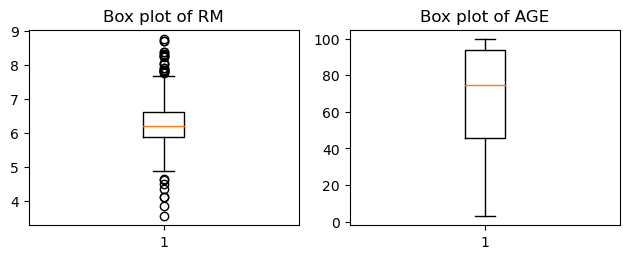

In [32]:
def showOutliers():
    for i, col in enumerate(['RM', 'AGE']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [35]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.700000,6.0622,3,222,18.7,394.12,5.210000,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.100000,5.9505,5,311,15.2,396.90,19.150000,27.1
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.300000,6.3467,5,311,15.2,392.52,20.450000,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


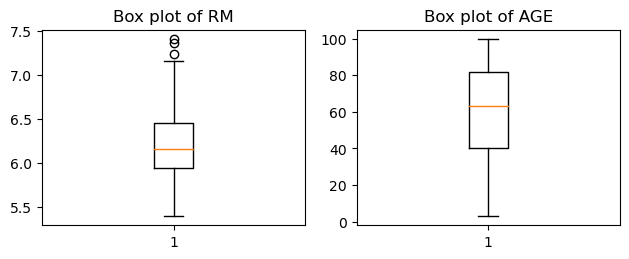

In [37]:
showOutliers()

In [40]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df[df.select_dtypes(include=np.number).columns])
print("Normalized Data (Min-Max Scaling):")
print(normalized_data)

Normalized Data (Min-Max Scaling):
[[0.         0.4        0.04344262 ... 1.         0.10905125 0.57345972]
 [0.00582157 0.         0.23852459 ... 1.         0.33587786 0.45971564]
 [0.00652604 0.         0.03811475 ... 0.90187081 0.12159215 0.79620853]
 ...
 [0.01509893 0.         0.43770492 ... 1.         0.14503817 0.56872038]
 [0.02864192 0.         0.43770492 ... 0.87822097 0.19083969 0.47867299]
 [0.01139631 0.         0.43770492 ... 1.         0.26717557 0.        ]]
